<a href="https://colab.research.google.com/github/Theophilus2023/githubtest/blob/main/MonteCarloSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

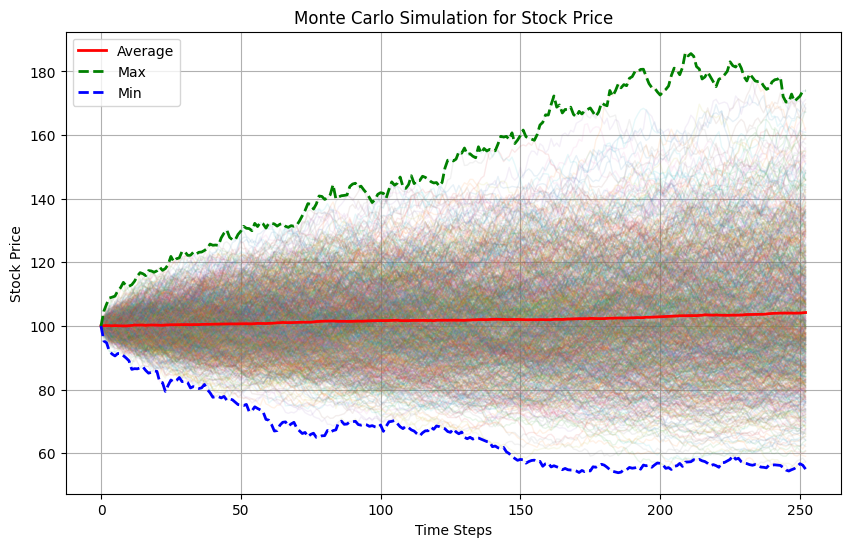

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_simulation(S0, mu, sigma, T, n_simulations, n_steps):
    dt = T / n_steps
    stock_price_paths = np.zeros((n_simulations, n_steps + 1))
    stock_price_paths[:, 0] = S0

    for i in range(n_simulations):
        for j in range(1, n_steps + 1):
            z = np.random.normal(0, 1)
            stock_price_paths[i, j] = stock_price_paths[i, j - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    return stock_price_paths

# Example usage
if __name__ == "__main__":
    # Model parameters
    S0 = 100  # Initial stock price
    mu = 0.05  # Drift (average return)
    sigma = 0.2  # Volatility
    T = 1.0  # Time horizon (in years)
    n_simulations = 1000  # Number of simulations
    n_steps = 252  # Number of steps (assuming daily steps for one year)

    # Run the Monte Carlo simulation
    stock_price_paths = monte_carlo_simulation(S0, mu, sigma, T, n_simulations, n_steps)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(n_steps + 1), stock_price_paths.T, lw=1, alpha=0.1)
    plt.plot(np.arange(n_steps + 1), stock_price_paths.mean(axis=0), 'r', lw=2, label='Average')
    plt.plot(np.arange(n_steps + 1), stock_price_paths.max(axis=0), 'g--', lw=2, label='Max')
    plt.plot(np.arange(n_steps + 1), stock_price_paths.min(axis=0), 'b--', lw=2, label='Min')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.title('Monte Carlo Simulation for Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()
